In [1]:
from skimage import img_as_float, io, img_as_uint
import matplotlib.pyplot as plt
import torch
from fiber_extraction import FiberExtractor, UNet

In [2]:
net = UNet(1, 1, 16, True).eval()
net.load_state_dict(torch.load('netG-16-20k-unaug.pt'))
fiber_extractor = FiberExtractor(net)

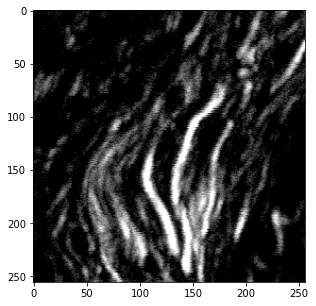

In [3]:
im_arr = img_as_uint(io.imread('example_input.png'))
plt.figure(figsize=(5, 5))
plt.imshow(im_arr, cmap='gray')
plt.show()

Draw masks using skeletonization


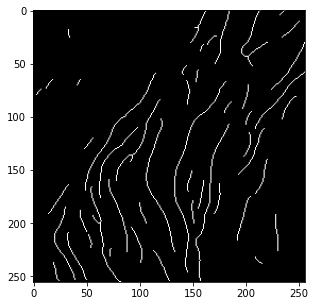

In [10]:
result = fiber_extractor.compute(im_arr, adjust_contrast=None)
# result = net(torch.FloatTensor(im_arr[None, None, :, :])).squeeze().detach().cpu().numpy()
plt.figure(figsize=(5, 5))
plt.imshow(result, cmap='gray')
plt.show()

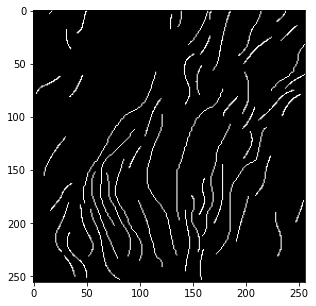

In [21]:
im_arr = img_as_uint(io.imread('example_groundtruth.png'))
plt.figure(figsize=(5, 5))
plt.imshow(im_arr, cmap='gray')
plt.show()